# EXAMS.CSV

1. CSV 파일을 Pandas DataFrame으로 받고, 모든 학생들의 평균 math, reading, writing score 출력

2. 선행과정(test preparation course)을 수료한 학생(completed)과 그렇지 않은 학생(none) 사이에 성적 추이 분석

3. 점심식사(lunch)를 하는 학생(standard)과 그렇지 않은 학생(free/reduced)사이에 성적 추이 분석

4. 부모의 교육 수준(parental level of education)에 따른 학생의 성적 분석 후 결론 내리기

## 1. 데이터 가져오기

### 데이터 가져오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/DATA_TERM_PR/exams.csv')

# 데이터 프레임 생성
df = pd.DataFrame(df)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


### 데이터 확인

In [4]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**범주형 자료**

관측 결과가 몇 개의 범주 또는 항목의 형태로 나타나는 자료

예) 성별(남/여), 혈액형, 지역

**수치형 자료**

관측된 값이 수치로 측정되는 자료

예) 키, 몸무게, 시험 성적, 자동차 사고 건수

In [5]:
# 수치형 데이터 통계 확인
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [6]:
# 범주형 데이터 통계 확인
df.describe(include = np.object_)

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,male,group C,some college,standard,none
freq,517,323,222,652,665


In [7]:
# 결측치 확인
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
print("전체 데이터 수 :", df.shape[0] * df.shape[1])
print("결측치 수 :", df.isnull().sum().sum())
print("전체 학생 수 :", df["gender"].count())

전체 데이터 수 : 8000
결측치 수 : 0
전체 학생 수 : 1000


## 2. 질문

#### 1. 모든 학생들의 평균 math, reading, writing score 출력

In [9]:
print(df[['math score']].mean())
print(df['math score'].mean())

math score    66.396
dtype: float64
66.396


In [10]:
print("학생들 math score 평균 :", df['math score'].mean())
print("학생들 reading score 평균 :", df['reading score'].mean())
print("학생들 writing score 평균 :", df['writing score'].mean())

학생들 math score 평균 : 66.396
학생들 reading score 평균 : 69.002
학생들 writing score 평균 : 67.738


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd25a4f7a30>,
      dtype=object)

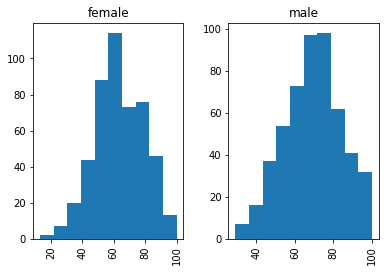

In [11]:
df.hist(column = 'math score', by = 'gender')

1. 모든 학생들의 평균 math, reading, writing score 출력

In [12]:
# 각 과목의 성적 평균
df_mean_score = df[["math score", "reading score", "writing score"]].mean().round(3)

color = px.colors.qualitative.Plotly

fig = make_subplots(rows = 1, cols = 3)

# 그래프 추가
fig.add_trace(
    go.Bar(x = [df_mean_score.index[0]],
           y = np.array(df_mean_score["math score"]),
           text = df_mean_score["math score"],
           marker_color = [color[0]]
           ),
    row = 1, col = 1
)

fig.add_trace(
    go.Bar(x = [df_mean_score.index[1]],
           y = np.array(df_mean_score["reading score"]),
           text = df_mean_score["reading score"],
           marker_color = [color[1]]),
    row = 1, col = 2
)

fig.add_trace(
    go.Bar(x = [df_mean_score.index[2]],
           y = np.array(df_mean_score["writing score"]),
           text = df_mean_score["writing score"],
           marker_color = [color[2]]),
    row = 1, col = 3
)

fig.update_xaxes(title = "Math", row = 1, col = 1)
fig.update_xaxes(title = "Reading", row = 1, col = 2)
fig.update_xaxes(title = "Writing", row = 1, col = 3)
fig.update_yaxes(title = "mean", row = 1, col = 1)
fig.update_yaxes(range=[0,100])

fig.update_traces(
    textposition = "outside",
    textfont_size = 15
)

fig.update_layout(
    title = dict(
        text = "모든 학생 평균 과목 성적",
        font_size = 20
    ),

    showlegend = False,
    template = "plotly_white"
)

fig.show()

In [13]:
# 학생 성별 비율 시각화

fig = px.pie(
    labels = df["gender"].value_counts().index,
    values = df["gender"].value_counts().values,
    names = df["gender"].value_counts().index)

fig.update_traces(
    textinfo = "label + percent + value",
    textfont_size = 15,
    textfont_color = "white"
)

fig.update_layout(
    title = dict(
        text = "<b>학생 성별 비율</b>",
        font_size = 20)
)

fig.show()

In [14]:
df_gender_score = df.groupby("gender")[["math score", "reading score", "writing score"]].mean().round(3)

color = px.colors.qualitative.Plotly

fig = make_subplots(rows = 1, cols = 3)

# 그래프 추가
fig.add_trace(
    go.Bar(x = df_gender_score.index,
           y = df_gender_score["math score"],
           text = df_gender_score["math score"],
           marker_color = [color[0], color[1]]),
    row = 1, col = 1
)

fig.add_trace(
    go.Bar(x = df_gender_score.index,
           y = df_gender_score["reading score"],
           text = df_gender_score["reading score"],
           marker_color = [color[0], color[1]]),
    row = 1, col = 2
)

fig.add_trace(
    go.Bar(x = df_gender_score.index,
           y = df_gender_score["writing score"],
           text = df_gender_score["writing score"],
           marker_color = [color[0], color[1]]),
    row = 1, col = 3
)

fig.update_xaxes(title = "Math", row = 1, col = 1)
fig.update_xaxes(title = "Reading", row = 1, col = 2)
fig.update_xaxes(title = "Writing", row = 1, col = 3)

fig.update_yaxes(title = "mean", row = 1, col = 1)
fig.update_yaxes(range=[0,100])

fig.update_traces(
    textposition = "outside",
    textfont_size = 15
)

fig.update_layout(
    title = dict(
        text = "성별과 과목 성적의 관계",
        font_size = 20
    ),

    showlegend = False,
    template = "plotly_white"
)

fig.show()

2. 선행과정(test preparation course)를 수료한 학생(completed)과 그렇지 않은 학생(none) 사이에 성적 추이 분석

In [15]:
# 선행과정 여부에 따른 시각화

fig = px.pie(
    labels = df["test preparation course"].value_counts().index,
    values = df["test preparation course"].value_counts().values,
    names = df["test preparation course"].value_counts().index)

fig.update_traces(
    textinfo = "label + percent + value",
    textfont_size = 15,
    textfont_color = "white"
)

fig.update_layout(
    title = dict(
        text = "<b>선행과정 수료/미수료 비율</b>",
        font_size = 20
    ),

    showlegend = False
)

fig.show()

In [19]:
# 선행과정 성별 비율

df_test_gender = df.groupby(["test preparation course", "gender"]).agg({"lunch" : "count"}).reset_index()
df_test_gender = df_test_gender.rename(columns = {"lunch" : "count"})

print(df_test_gender)

fig = px.bar(
    df_test_gender,
    x = "test preparation course",
    y = "count",
    color = "gender",
    barmode = "group",
    text = "count"
)

fig.update_traces(
    textposition = "outside",
    textfont_size = 15
)

fig.update_layout(
    title = dict(
        text = "<b>선행과정 여부별 성별 비율</b>",
        font_size = 20
    ),

    xaxis = dict(title = "선행과정 여부"),
    yaxis = dict(title = "학생 수"),

    template = "plotly_white"
)

fig.show()

  test preparation course  gender  count
0               completed  female    160
1               completed    male    175
2                    none  female    323
3                    none    male    342


In [18]:
df_course_score = df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean().round(3)

color = px.colors.qualitative.Plotly

fig = make_subplots(rows = 1, cols = 3)

# 그래프 추가
fig.add_trace(
    go.Bar(x = df_course_score.index,
           y = df_course_score["math score"],
           text = df_course_score["math score"],
           marker_color = [color[0], color[1]]),
    row = 1, col = 1
)

fig.add_trace(
    go.Bar(x = df_course_score.index,
           y = df_course_score["reading score"],
           text = df_course_score["reading score"],
           marker_color = [color[0], color[1]]),
    row = 1, col = 2
)

fig.add_trace(
    go.Bar(x = df_course_score.index,
           y = df_course_score["writing score"],
           text = df_course_score["writing score"],
           marker_color = [color[0], color[1]]),
    row = 1, col = 3
)

fig.update_xaxes(title = "Math", row = 1, col = 1)
fig.update_xaxes(title = "Reading", row = 1, col = 2)
fig.update_xaxes(title = "Writing", row = 1, col = 3)

fig.update_yaxes(title = "mean", row = 1, col = 1)
fig.update_yaxes(range=[0,100])

fig.update_traces(
    textposition = "outside",
    textfont_size = 15
)

fig.update_layout(
    title = dict(
        text = "선행과정 수료와 과목 성적 관계",
        font_size = 20
    ),

    showlegend = False,
    template = "plotly_white"
)

fig.show()

3. 점심식사(lunch)를 하는 학생(standard)과 그렇지 않은 학생(free/reduced)사이에 성적 추이 분석

In [22]:
# 점심식사 여부에 따른 시각화

fig = px.pie(
    labels = df["lunch"].value_counts().index,
    values = df["lunch"].value_counts().values,
    names = df["lunch"].value_counts().index)

fig.update_traces(
    textinfo = "label + percent + value",
    textfont_size = 15,
    textfont_color = "white"
)

fig.update_layout(
    title = dict(
        text = "<b>점심식사 여부 비율</b>",
        font_size = 20
    )
)

fig.show()

In [23]:
df_lunch_score = df.groupby("lunch")[["math score", "reading score", "writing score"]].mean().round(3)

color = px.colors.qualitative.Plotly

fig = make_subplots(rows = 1, cols = 3)

# 그래프 추가
fig.add_trace(
    go.Bar(x = df_lunch_score.index,
           y = df_lunch_score["math score"],
           text = df_lunch_score["math score"],
           marker_color = [color[0], color[1]]),
    row = 1, col = 1
)

fig.add_trace(
    go.Bar(x = df_lunch_score.index,
           y = df_lunch_score["reading score"],
           text = df_lunch_score["reading score"],
           marker_color = [color[0], color[1]]),
    row = 1, col = 2
)

fig.add_trace(
    go.Bar(x = df_lunch_score.index,
           y = df_lunch_score["writing score"],
           text = df_lunch_score["writing score"],
           marker_color = [color[0], color[1]]),
    row = 1, col = 3
)

fig.update_xaxes(title = "Math", row = 1, col = 1)
fig.update_xaxes(title = "Reading", row = 1, col = 2)
fig.update_xaxes(title = "Writing", row = 1, col = 3)

fig.update_yaxes(title = "mean", row = 1, col = 1)
fig.update_yaxes(range=[0,100])

fig.update_traces(
    textposition = "outside",
    textfont_size = 15
)

fig.update_layout(
    title = dict(
        text = "점심식사 여부와 과목 성적 관계",
        font_size = 20
    ),

    showlegend = False,
    template = "plotly_white"
)

fig.show()

4. 부모의 교육 수준(parental level of education)에 따른 학생의 성적 분석 후 결론 내리기

In [40]:
# 부모의 교육 수준에 따른 시각화

fig = px.pie(
    labels = df["parental level of education"].value_counts().index,
    values = df["parental level of education"].value_counts().values,
    names = df["parental level of education"].value_counts().index)

fig.update_traces(
    textinfo = "label + percent + value",
    textfont_size = 11,
    textfont_color = "white"
)

fig.update_layout(
    title = dict(
        text = "<b>부모의 교육 수준 비율</b>",
        font_size = 20
    )
)

fig.show()

In [31]:
# 부모의 교육 수준별 성별 비율

df_parent_gender = df.groupby(["parental level of education", "gender"]).agg({"lunch" : "count"}).reset_index()
df_parent_gender = df_parent_gender.rename(columns = {"lunch" : "count"})

fig = px.bar(
    df_parent_gender,
    x = "parental level of education",
    y = "count",
    color = "gender",
    barmode = "group",
    text = "count"
)

fig.update_traces(
    textposition = "outside",
    textfont_size = 15
)

fig.update_layout(
    title = dict(
        text = "<b>부모의 교육 수준별 성별 비율</b>",
        font_size = 20
    ),

    xaxis = dict(title = "부모의 교육 수준"),
    yaxis = dict(title = "수"),

    template = "plotly_white"
)

fig.show()

In [24]:
df_parent_education_score = df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean().round(3)

color = px.colors.qualitative.Plotly

fig = make_subplots(rows = 1, cols = 3)

# 그래프 추가
fig.add_trace(
    go.Bar(x = df_parent_education_score.index,
           y = df_parent_education_score["math score"],
           text = df_parent_education_score["math score"],
           marker_color = [color[0], color[1], color[2], color[3], color[4]]),
    row = 1, col = 1
)

fig.add_trace(
    go.Bar(x = df_parent_education_score.index,
           y = df_parent_education_score["reading score"],
           text = df_parent_education_score["reading score"],
           marker_color = [color[0], color[1], color[2], color[3], color[4]]),
    row = 1, col = 2
)

fig.add_trace(
    go.Bar(x = df_parent_education_score.index,
           y = df_parent_education_score["writing score"],
           text = df_parent_education_score["writing score"],
           marker_color = [color[0], color[1], color[2], color[3], color[4]]),
    row = 1, col = 3
)

fig.update_xaxes(title = "Math", row = 1, col = 1)
fig.update_xaxes(title = "Reading", row = 1, col = 2)
fig.update_xaxes(title = "Writing", row = 1, col = 3)

fig.update_yaxes(title = "mean", row = 1, col = 1)
fig.update_yaxes(range=[0,100])

fig.update_traces(
    textposition = "outside",
    textfont_size = 15
)

fig.update_layout(
    title = dict(
        text = "부모 교육 수준과 과목 평균 성적 관계",
        font_size = 20
    ),
    showlegend = False,
)

fig.show()

In [25]:
fig = make_subplots(rows = 3, cols = 1)

fig.add_trace(
    go.Box(
        x = df["parental level of education"],
        y = df["math score"],
        marker_color = color[0],
        name = "Math"
    ),
    row = 1, col = 1
)

fig.add_trace(
    go.Box(
        x = df["parental level of education"],
        y = df["reading score"],
        marker_color = color[1],
        name = "Reading"
    ),
    row = 2, col = 1
)

fig.add_trace(
    go.Box(
        x = df["parental level of education"],
        y = df["writing score"],
        marker_color = color[2],
        name = "Writing"
    ),
    row = 3, col = 1
)

fig.update_xaxes(title = "부모의 교육 수준", row = 3, col = 1)

fig.update_yaxes(title = "Math socre", row = 1, col = 1)
fig.update_yaxes(title = "Reading socre", row = 2, col = 1)
fig.update_yaxes(title = "Writing socre", row = 3, col = 1)

fig.update_layout(
    height = 1000,
    title = dict(
        text = "<b>부모 교육 수준과 과목별 성적의 관계</b>",
        font_size = 20
    )
)

fig.show()